### Задание 1.3
Выполните по вариантам соответственно реализацию генетического алгоритма в соответствии с приложенными начальными данными.
![Картинка задания 1.3](src/practice_6/1.3.jpg)


In [3]:
def qZ(x, y):
    return (x - 3*y) / (2*x**2 + 2*y**2 + 1)

def qSumZ(Z):
  return sum(Z)

def exchangeScheme(oldX, oldY, sortedId):
  X = [0 for i in range(4)]
  Y = [0 for i in range(4)]
  X[2] = oldX[sortedId[2]]
  X[3] = oldX[sortedId[2]]
  X[0] = oldX[sortedId[0]]
  X[1] = oldX[sortedId[1]]
  Y[0] = oldY[sortedId[2]]
  Y[1] = oldY[sortedId[2]]
  Y[2] = oldY[sortedId[0]]
  Y[3] = oldY[sortedId[1]]
  return X, Y

def sorting(Z):
  sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
  return sortedId

def evoStep(X, Y, Z):
  _, minId = min((value, id) for (id, value) in enumerate(Z))
  X = X[:]
  Y = Y[:]
  Z = Z[:]
  X. pop(minId)
  Y.pop(minId)
  Z.pop(minId)
  return X, Y, Z

def evoSteps(X, Y):
  results = []
  for i in range(4):
    arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
    X, Y, Z = evoStep(X, Y, arrZ)
    X, Y = exchangeScheme(X, Y, sorting(Z))
    results.append([X, Y, qSumZ(arrZ), arrZ])
  return X, Y, results

X = [-1, 0, 2, 3]
Y = [0, 1, -2, 2]

results = evoSteps(X, Y)

for i in range(len(results[2])):
  print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []

for i in range(len(results[2])):
  qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}')

max_1_step: -0.9738562091503267
max_2_step: 0.7748068924539511
max_3_step: 0.9251336898395722
max_4_step: 1.7290552584670231
max Z: 0.47058823529411764


### Задание 2.3.1
Найти длину гамильтонова цикла S4 в полном графе K6 после четырех циклов решения задачи методом отжига по вариантам ниже.

![Картинка задания 2.3.1](src/practice_6/2.3.1.jpg)

In [ ]:
!pip install networkx

Лучший выбранный маршрут: [1, 6, 5, 4, 3, 2, 1]
Длина лучшего выбранного маршрута: 130
Длины всех рассмотренных маршрутов: [145, 158, 183, 130, 146]


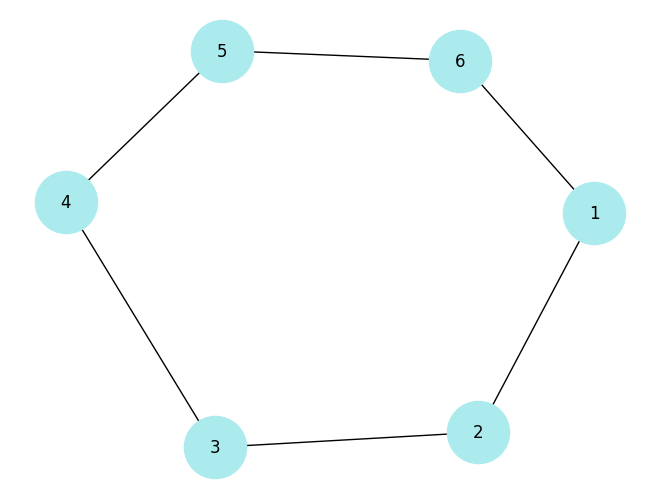

In [10]:
import networkx as nx
from math import e

distances = [
    (1, 2, 24),
    (1, 3, 41),
    (1, 4, 36),
    (1, 5, 22),
    (1, 6, 19),

    (2, 3, 21),
    (2, 4, 33),
    (2, 5, 33),
    (2, 6, 14),

    (3, 4, 27),
    (3, 5, 39),
    (3, 6, 23),

    (4, 5, 20),
    (4, 6, 20),

    (5, 6, 19),
    ]

V = [1, 3, 4, 5, 6, 2, 1]
Z = [(3, 4), (4, 6), (5, 2), (6, 2)]
P = [33, 82, 51, 76]
T = 100

#функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta / T)

#функция изменения температуры
def reductTemp(prevT):
    nextT = .5 * prevT
    return nextT

graph = nx.Graph() #создание пустого графа
graph.add_weighted_edges_from(distances) #добавление весов рёбер

#отрисовка графа с заданными вершинами
# nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

#вычисление длины ребра
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                   for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

#вычисление длины маршрута
def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

    return sum(edges)

#одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

#перестановка в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

#выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) #нахождение длины пути
    arrSum = [sumLength] #массив сумм длин

    #циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) #новый маршрут после перестановки
        newS = routeLength(newV, distances) #длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength #разница между длиной нового и старого маршрутов

        #в случае, если разница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = probability(deltaS, T) #подсчёт вероятности

            #если заданная вероятность попадает в интервал от 0 до p, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T) #вычисление температуры

    return V, arrSum

#отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    #прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)

    graph = nx.Graph() #создание пустого графа

    graph.add_weighted_edges_from(newDistances) #добавление весов рёбер
    #отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#abebee', node_size=2000, with_labels=True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) #отрисовка лучшего маршрута

### Задание 2.3.2
На решенном уже примере поэкспериментируйте с показателем S, проанализируйте результаты.